In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA


In [2]:
df_train = pd.read_csv('train_df.csv')
df_test = pd.read_csv('test_df.csv')


In [3]:
stl1 = STL(df_train["value"], period=24)
res1 = stl1.fit()
detrended1 = df_train["value"] - res1.seasonal


# 2. Sezonowość tygodniowa (168 godzin)
stl2 = STL(detrended1, period=168)
res2 = stl2.fit()

### ARIMA trend+resid

In [ ]:


trend_and_resid = res2.trend+res2.resid

model = ARIMA(endog=trend_and_resid,    
                order=(25, 0, 25),          # ARIMA: p=25  # sezonowość tygodniowa
                enforce_stationarity=False,
                enforce_invertibility=False
                )
model_fit = model.fit()

c:\Users\micha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE: 0.10
MAE: 2144.94
RMSE: 5942450.37


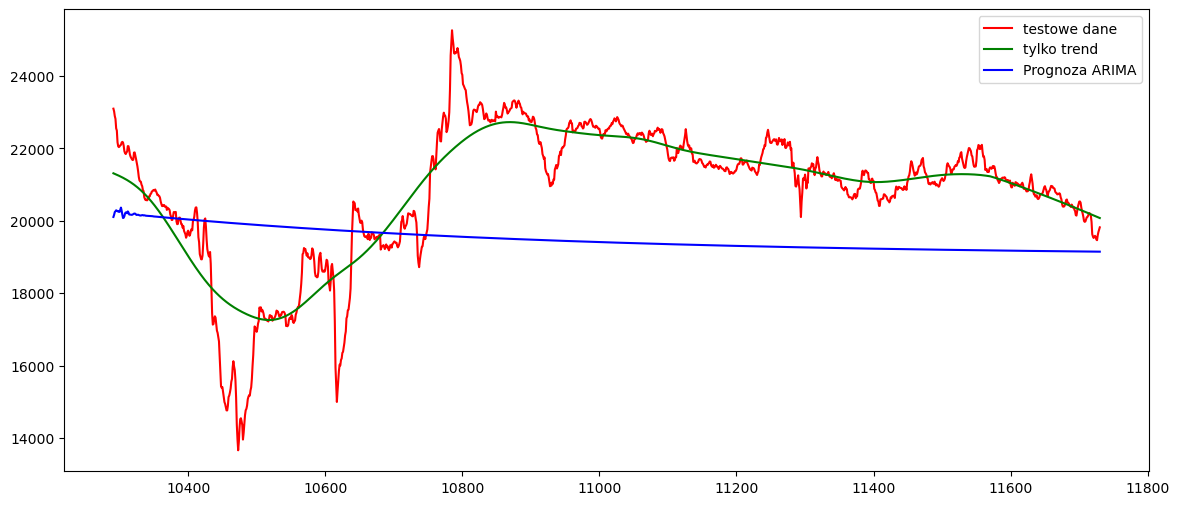

In [12]:
# Dopasuj model i prognozuj
forecast = model_fit.forecast(steps=len(res2.trend[-24*60:]))

forecast_v = np.concatenate((np.full(len(res2.trend[:-24*60]), np.nan), forecast.values))
mape_value = mape(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)
mae_value = mae(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)
rmse_value = rmse(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)


plt.figure(figsize=(14, 6))
# plt.plot(res2.trend[-24*60:]+res2.resid[-24*60:], label='treningowe dane', color='black')
plt.plot(res2.trend[-24*60:]+res2.resid[-24*60:], label='testowe dane', color='red')
plt.plot(res2.trend[-24*60:], label='tylko trend', color='green')

plt.plot(forecast_v, label='Prognoza ARIMA', color='blue')

plt.legend()

print(f"MAPE: {mape_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")

### ARIMA trend

In [6]:



model = ARIMA(endog=res2.trend,    
                order=(2, 0, 1),          # ARIMA: p=25  # sezonowość tygodniowa
                enforce_stationarity=False,
                enforce_invertibility=False
                )
model_fit = model.fit()

c:\Users\micha\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAPE: 0.11
MAE: 2259.66
RMSE: 8952122.51


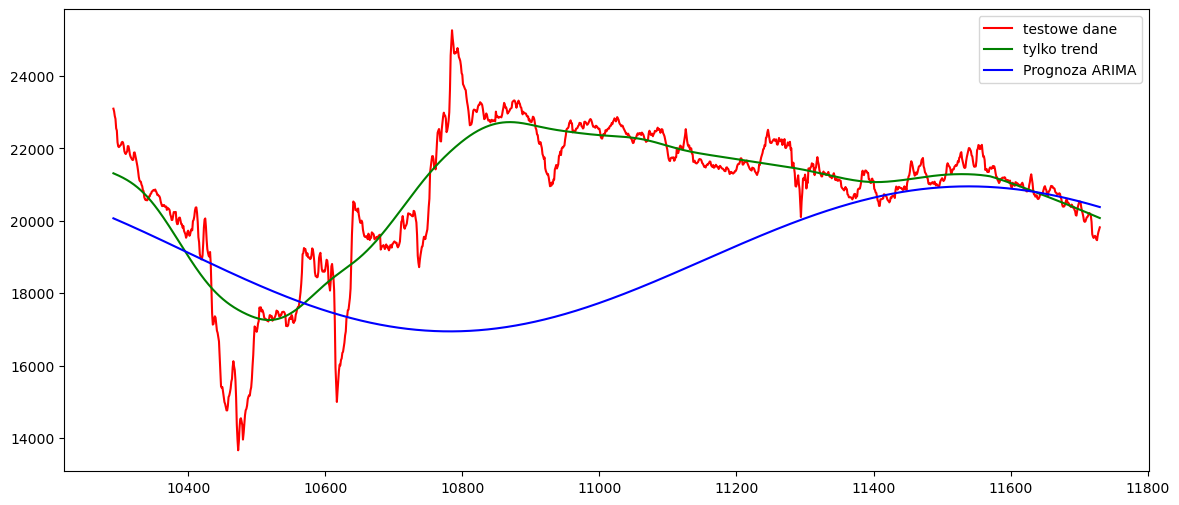

In [7]:
# Dopasuj model i prognozuj
forecast = model_fit.forecast(steps=len(res2.trend[-24*60:]))

forecast_v = np.concatenate((np.full(len(res2.trend[:-24*60]), np.nan), forecast.values))
mape_value = mape(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)
mae_value = mae(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)
rmse_value = rmse(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)


plt.figure(figsize=(14, 6))
# plt.plot(res2.trend[-24*60:]+res2.resid[-24*60:], label='treningowe dane', color='black')
plt.plot(res2.trend[-24*60:]+res2.resid[-24*60:], label='testowe dane', color='red')
plt.plot(res2.trend[-24*60:], label='tylko trend', color='green')

plt.plot(forecast_v, label='Prognoza ARIMA', color='blue')

plt.legend()

print(f"MAPE: {mape_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")

### ARIMA tylko dla Reszt

In [8]:
model = ARIMA(endog=res2.resid,    
                order=(2, 0, 1),          
                enforce_stationarity=False,
                enforce_invertibility=False
                )
model_fit = model.fit()

MAPE: 1.00
MAE: 20794.23
RMSE: 436056922.17


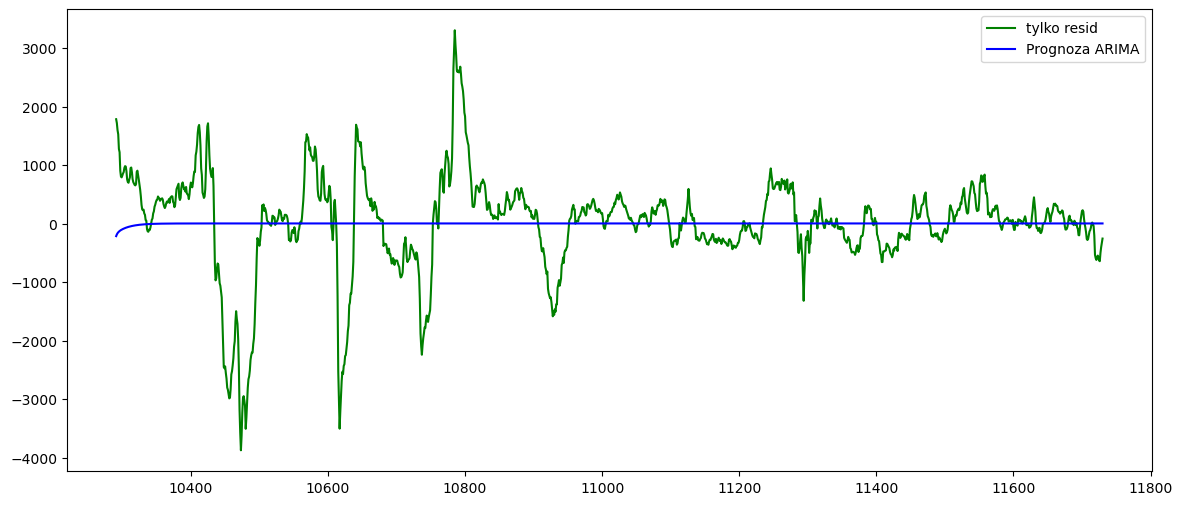

In [13]:
# Dopasuj model i prognozuj
forecast = model_fit.forecast(steps=len(res2.trend[-24*60:]))

forecast_v = np.concatenate((np.full(len(res2.trend[:-24*60]), np.nan), forecast.values))
# mape_value = mape(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)
# mae_value = mae(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)
# rmse_value = rmse(res2.trend[-24*60:]+res2.resid[-24*60:], forecast.values)


plt.figure(figsize=(14, 6))
# plt.plot(res2.trend[-24*60:]+res2.resid[-24*60:], label='treningowe dane', color='black')
# plt.plot(res2.trend[-24*60:]+res2.resid[-24*60:], label='testowe dane', color='red')
plt.plot(res2.resid[-24*60:], label='tylko resid', color='green')

plt.plot(forecast_v, label='Prognoza ARIMA', color='blue')

plt.legend()

print(f"MAPE: {mape_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")